In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [2]:
data1=pd.read_csv('../input/diabetes/diabetes.csv')

In [3]:
data1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data1.iloc[:,0:1]

,Pregnancies
0,6
1,1
2,8
3,1
4,0
...,...
763,10
764,2
765,5
766,1


In [5]:

x = data1.iloc[:, [0, 1, 2, 3,4,5,6,7]].values
x


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [6]:
y=data1.iloc[:,8:9].values
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

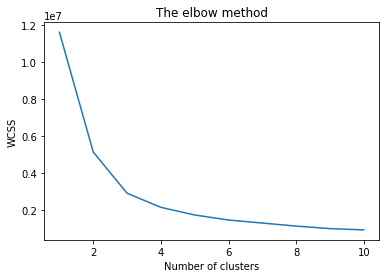

In [7]:

#Now we will implement the elbow method to find the optimum number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [8]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 2 1 0 2 0 3 0 0 0 0 3 1 0 1 0 2 2 1 0 0 0 2 2 0 2 2 0 0 1 0 0 0 1 0
 0 0 1 2 0 0 1 0 0 0 0 0 0 2 0 0 1 1 0 1 2 0 2 0 0 0 2 0 0 0 0 0 2 2 2 0 1
 0 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 0 1 0 0 2 1 0 2 2 1 0 0 0 0 0 2 0 2 0 0 2
 3 0 0 1 0 0 0 0 0 2 0 2 0 0 2 2 2 2 0 1 0 1 0 0 2 0 2 0 1 0 0 2 0 1 0 0 2
 0 0 1 0 2 3 0 0 2 2 0 2 0 2 1 0 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 0 0 2 0 0 0
 0 3 2 2 2 0 2 0 0 0 1 0 0 2 1 0 0 0 0 1 0 1 0 2 0 0 0 0 2 1 1 2 2 0 0 3 0
 0 1 2 0 0 0 3 2 0 1 0 0 0 0 1 0 0 0 0 2 0 1 1 0 0 3 3 0 0 0 0 0 1 0 0 0 3
 2 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 1 0 2 2 0 0 2 3 1 0 2 0 2 1 1 0 2
 1 1 1 0 0 2 0 0 0 2 2 2 1 1 0 2 2 2 0 2 2 0 2 0 1 0 0 0 0 1 2 0 2 2 0 0 0
 0 2 1 0 0 1 0 2 2 0 0 0 2 2 0 2 0 0 0 0 0 0 0 2 0 2 1 1 0 0 0 1 2 0 0 2 2
 3 2 2 2 2 1 2 2 0 2 2 0 1 2 2 0 0 0 1 2 1 0 3 2 0 1 2 0 0 0 0 0 2 0 0 2 0
 0 0 3 0 1 1 2 1 3 0 0 0 2 1 2 2 0 1 1 0 1 2 1 0 2 2 0 0 0 0 0 0 0 0 0 2 0
 0 0 2 2 2 2 2 0 1 0 2 0 0 2 1 2 2 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 1 2 2 0 1
 0 0 2 0 1 3 1 0 0 2 0 0 

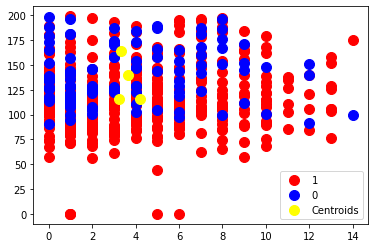

In [9]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = '0')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()





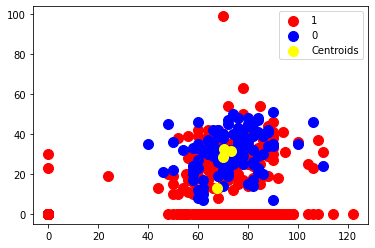

In [10]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = '1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = '0')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()





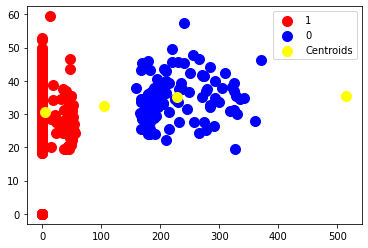

In [11]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 4], x[y_kmeans == 0, 5], s = 100, c = 'red', label = '1')
plt.scatter(x[y_kmeans == 1, 4], x[y_kmeans == 1, 5], s = 100, c = 'blue', label = '0')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:,5], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()





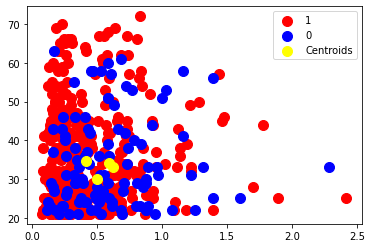

In [12]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 6], x[y_kmeans == 0, 7], s = 100, c = 'red', label = '1')
plt.scatter(x[y_kmeans == 1, 6], x[y_kmeans == 1, 7], s = 100, c = 'blue', label = '0')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:,7], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()





In [13]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x,y_kmeans)
print("For n_clusters =",4 ,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.42935982436769676
